# Pizza Dataset

This notebook shows how to use the Neural Network Framework for building a network for binary classification. The dataset
used is the Pizza dataset from the exercises.

## 1. Dataset

The dataset can be loaded from the `delivery-data.csv` file:

In [1]:
import pandas as pd

delivery_data = pd.read_csv("./delivery_data.csv")
X_delivery = delivery_data[["motivation", "distance"]].to_numpy()
y_delivery = delivery_data["delivery?"].to_numpy()

The dataset contains two attributes: the motivation of a customer and their distance to a restaurant. The target values
indicate if the customer chose delivery or not.

## 2. Neural Network
## 2.1 Data Preparation

For training and effectively evaluating the model, we will do a training test split of the data:

In [2]:
from netneural.session.data_loader import train_test_split

train_per = 0.8  # the percentage we want for the training data
test_per = 0.2  # the percentage we want for the test data
X_train, y_train, X_test, y_test = train_test_split(X_delivery, y_delivery, 0.8, 0.2)[:4]  # we don't have validation sets

New data distribution: 
243 trainings samples 
57 test samples
0 validation samples



## 2.2 Creating the Network

Now, we can create a network for predicting, if people are going to choose delivery or not:

In [3]:
from netneural.network.nn import NeuralNetwork

feature_count = 2 # we know that we only have two input features
shape = (feature_count, 2, 2, 1)  # don't make the network too complicated

nn = NeuralNetwork(shape)  # use default values

Neural Network created


## 2.3 Training the Network

We can then train the network on our delivery data. This code will give us plots of the different metrics accuracy,
F1 score, and error on the training and test set.

Training the Network
Using Adam Optimizer 
Batchsize: 100


100%|██████████| 100/100 [00:00<00:00, 143.66it/s, F1 Test=0.812, F1 Training=0.773]
/Users/felixachter/source/personal-github/neural-network-framework/netneural/network/plot_lib.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Training of the Neural Network Done
F1 Score (Training Set): 0.773
F1 Score (Test Set): 0.812


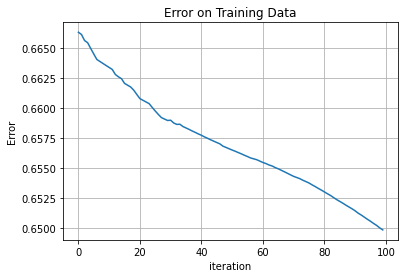

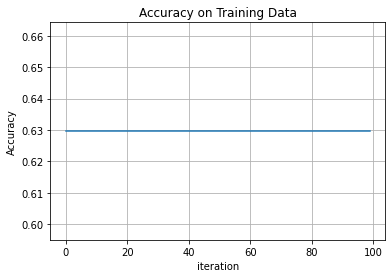

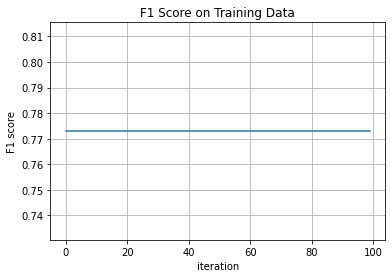

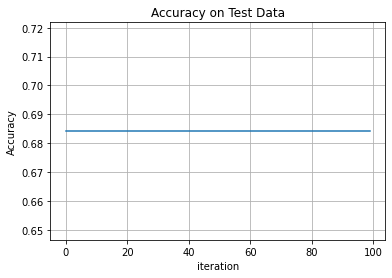

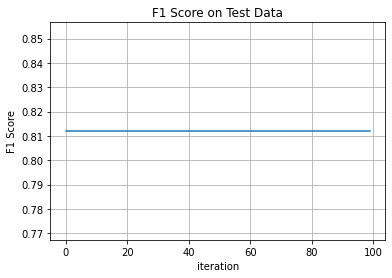

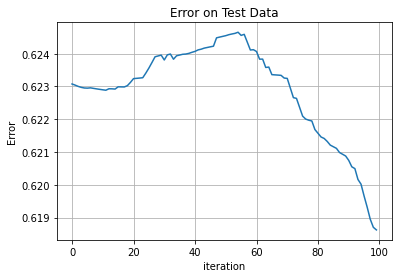

In [4]:
iterations = 100
learning_rate = 0.001
batch_size = 100  # size of batch for training on each iteration
f1_score_history, acc_history, err_history = nn.train(X_train, y_train, iterations, learning_rate, batch_size, X_test, y_test, optimizer='adam', plots=True)

# 3. Using the Network
We now have a new customer Tom, he lives relatively close to the restaurant and is highly motivated to go out of his house:

In [5]:
import numpy as np

tom = np.array([9.54, 0.34])

Let's predict if he will choose delivery, according to the trained model:

In [6]:
prediction = nn.predict(tom)
if prediction == 0:
    print('Tom is going to walk to the restaurant! (At least the model thinks so)')
else:
    print('Tom is going to order the food. (At least the model thinks so)')

Tom is going to order the food. (At least the model thinks so)
